In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,chisquare
from pandas.plotting import scatter_matrix
import plotly.graph_objs as go
import plotly.offline as py
from datetime import datetime, date
from IPython.display import Image
from matplotlib import colors
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Business problem/Real-world Problem**




**What is ELO?**

It is one of the biggest and most reliable payment brands in Brazil. It planned a reward program to attract customers. So, the frequency of using their payment brand has increased.

**What is a loyalty Score?**

Loyalty is a numerical score calculated 2 months after the historical and evaluation period. It acts as a target feature in our training data.

This reward program is planned by the owners of a company to attract customers. So, the frequency of using their payment brand has increased. Basically, these programs make the customer’s **choice more strongly towards the usage of Elo**. It is also necessary that policies made by the companies are known to his customers.

Why did ELO build  ML model?

Elo  built machine learning models to understand the most important aspects and preferences in their customer.

**Metric function**: Predictions are evaluated based on Root Mean Squared Error.
RMSE(Root-mean-square-error) for reducing the difference between predicted and actual rating(Regression problem).


**Objectives:**

1.Predict loyalty score  and help Elo reduce unwanted campaigns.

2.Minimize the difference between predicted and actual Score (RMSE)

Data Overview:
We have 5 dataset files for this problem. 

All the files are in CSV format.

**Historical_transactions**: Contains up to 3 months of transactions for every card at any of the provided merchant_id’s.

**Merchan**t: contains the aggregate information for each merchant_id represented in the dataset.

**New_merchant_transactions**: contains the transactions at new merchants(merchant_ids that this particular card_id has not yet visited) over a period of two months.

**Train**: Contains 6 features, which is first_active_month, card_id, feature_1, feature_2, feature_3 and target.

**Test**: Contains the same feature as present in train data but the target feature is not present in this dataset.



There are 2 main datasets that contain a list of unique credit cards and the target variable to predict:

**Train.csv**

**Test.csv**

Then, there are 2 datasets that contain information about all **transactions of these cards** buying from different merchants:

**historical_transactions.csv**
**new_merchant_transactions.csv**

Lastly, there is 1 dataset that contains information about the merchants:

**merchants.csv**

Basically, this notebook explores all these datasets and their connections.

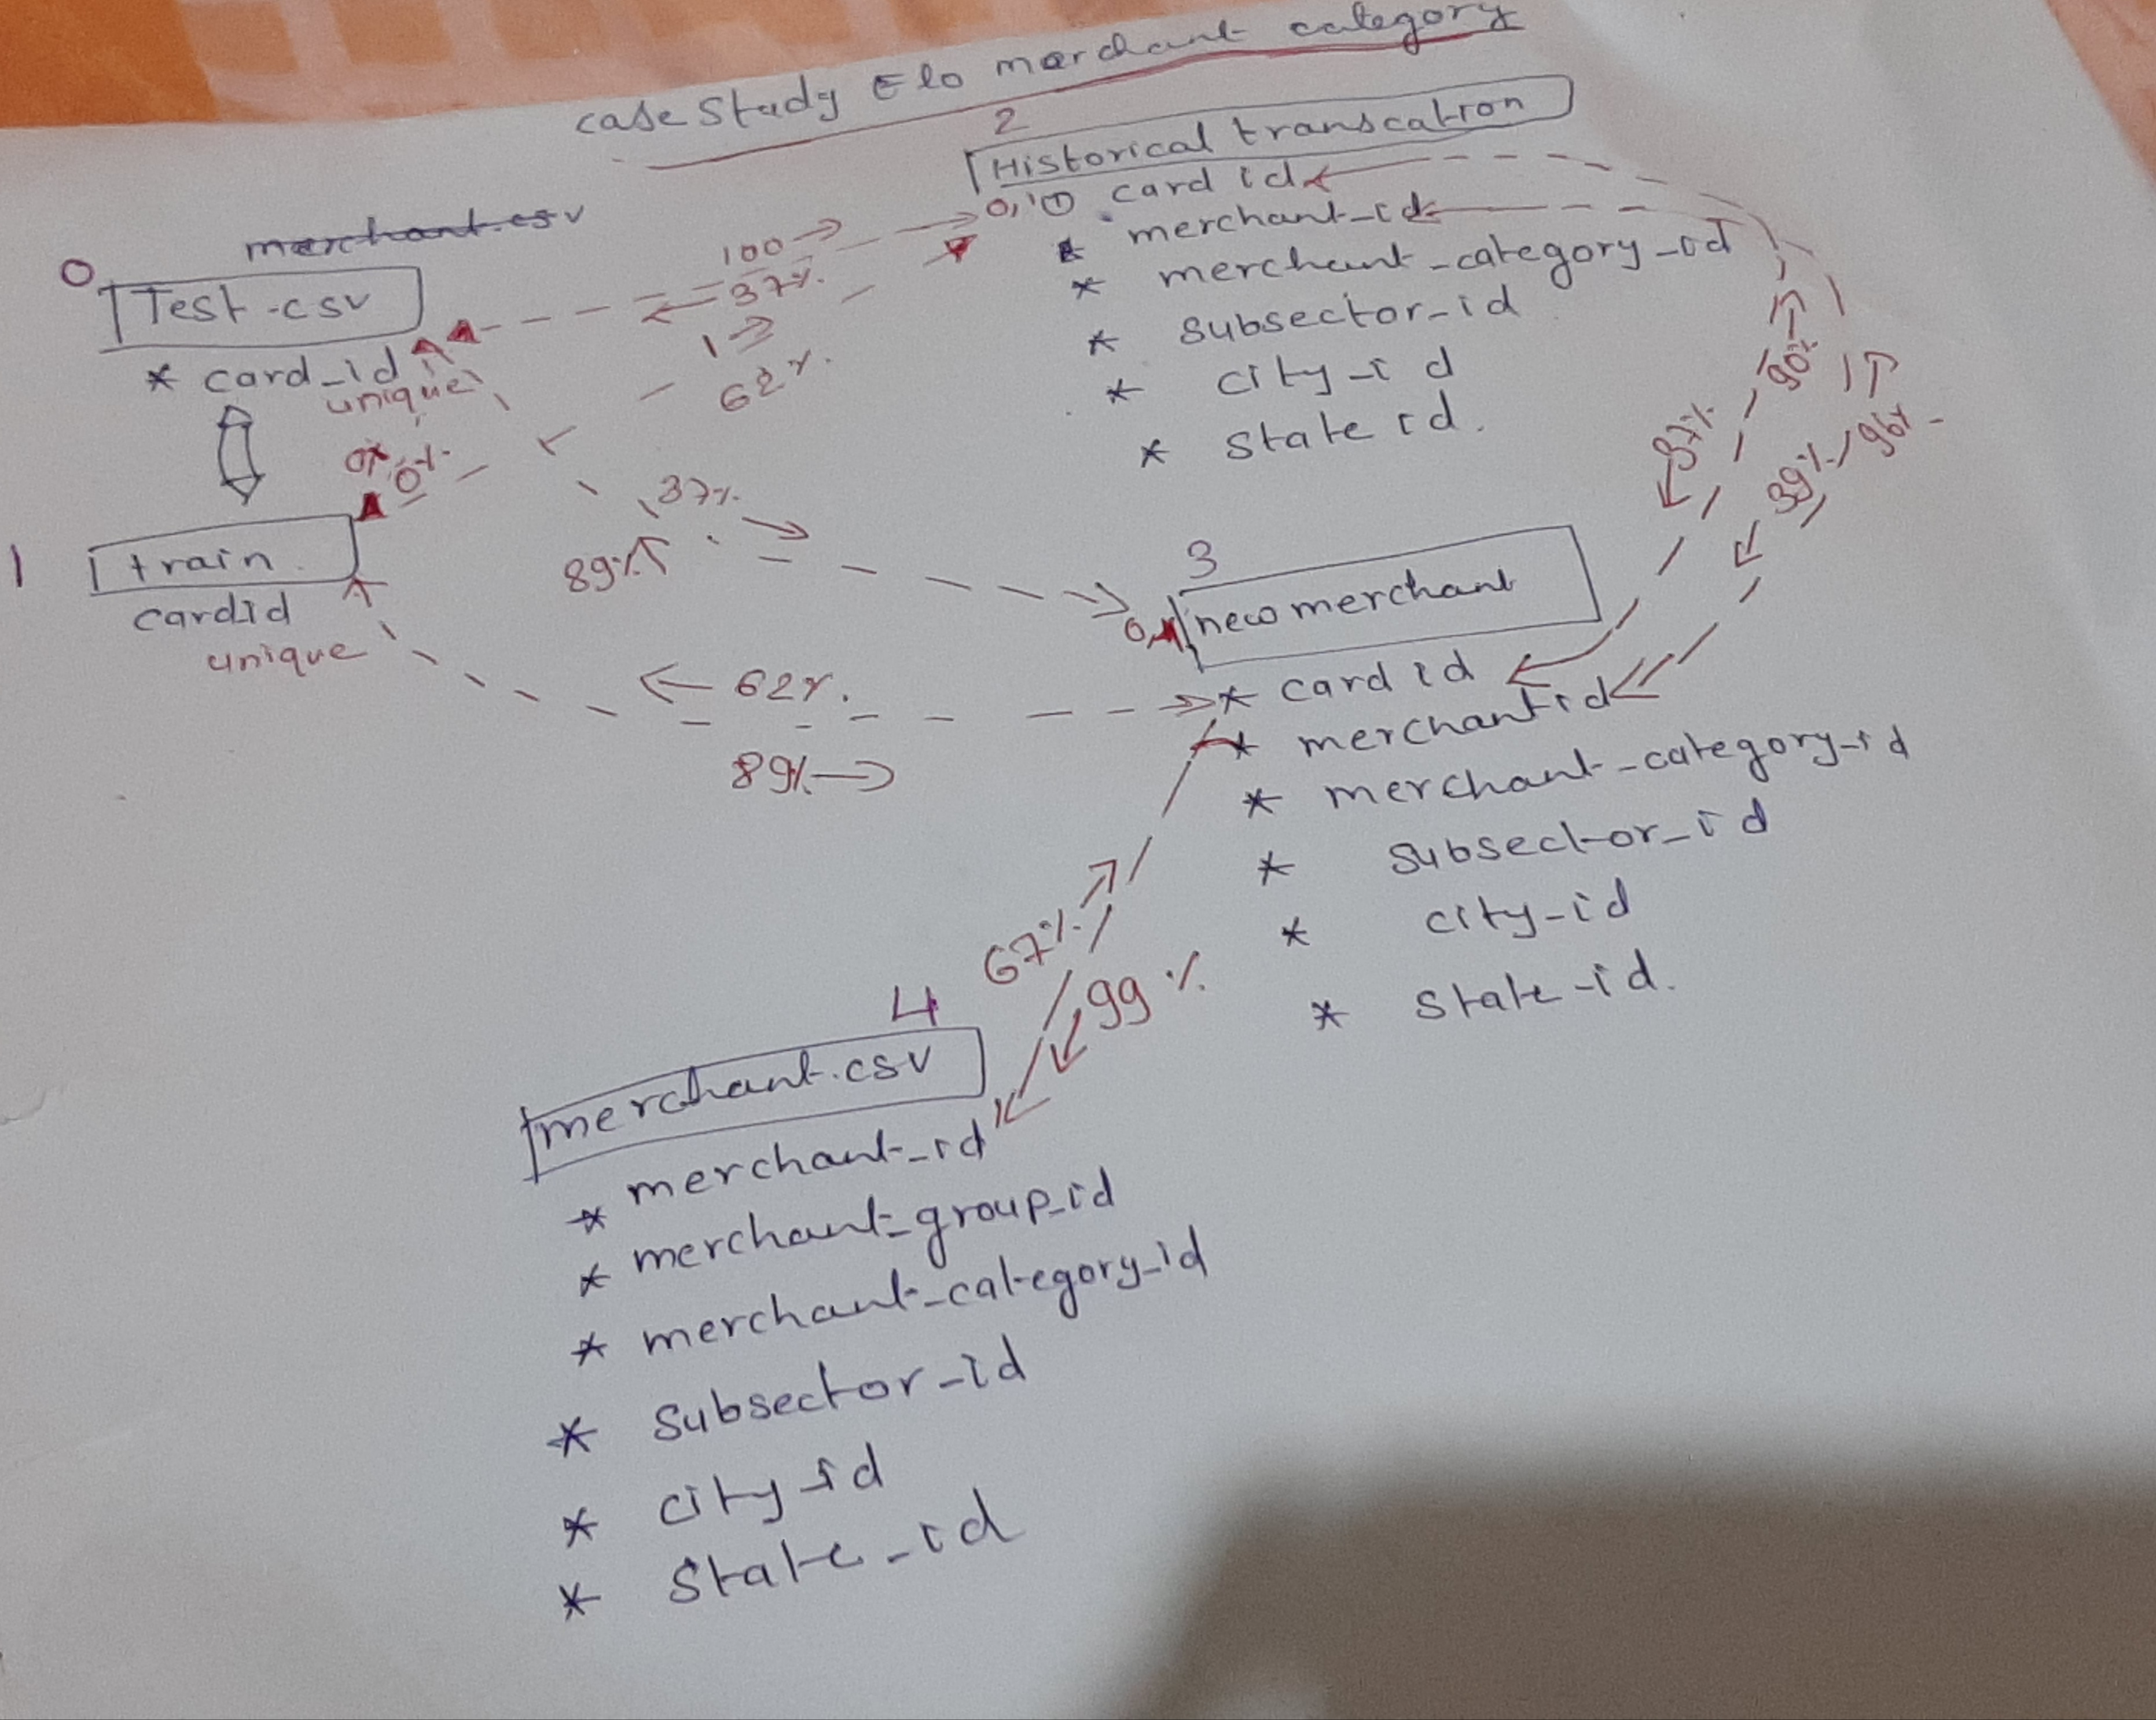

In [ ]:
Image(filename='/content/drive/MyDrive/elo-merchant-category-recommendation/20210207_031609.jpg')

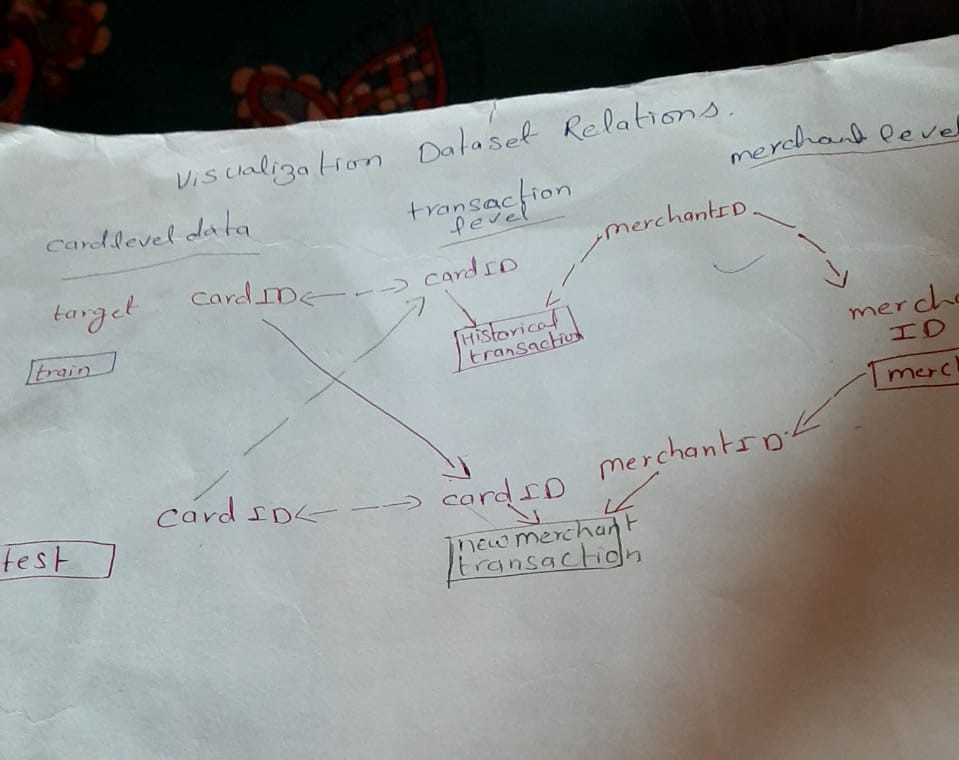

In [ ]:
Image(filename='/content/drive/MyDrive/elo-merchant-category-recommendation/image.jpeg')

ELo Merchant datasets has 3 levels of data

1.card_level data

2.transaction level data

3.merchant level dataset

# **merchants.csv**

In [ ]:
merchants = pd.read_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/merchants.csv")

In [ ]:
merchants.shape

(334696, 22)

In [ ]:
merchants.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
merchants.dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
numerical_1                    float64
numerical_2                    float64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3               int64
avg_sales_lag6                 float64
avg_purchases_lag6             float64
active_months_lag6               int64
avg_sales_lag12                float64
avg_purchases_lag12            float64
active_months_lag12              int64
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [ ]:
merchants.nunique(dropna=False,axis=0)

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
numerical_1                       954
numerical_2                       947
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3373
avg_purchases_lag3             100003
active_months_lag3                  3
avg_sales_lag6                   4508
avg_purchases_lag6             135202
active_months_lag6                  6
avg_sales_lag12                  5010
avg_purchases_lag12            172917
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          6
dtype: int64

In [ ]:
merchants.isnull().sum(axis=0)

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64


We can see that there are:

**6 features type ID**: merchant_id, merchant_group_id, merchant_category_id, subsector_id, city_id, state_id

**3 features type integer/counter**  active_months_lag3, active_months_lag6, active_months_lag12

**8 feature type numerical**: numerical_1, numerical_2, avg_sales_lag3, avg_purchases_lag3, avg_sales_lag6, avg_purchases_lag6, avg_sales_lag12, avg_purchases_lag12

**5 features type categorical**: category_1, most_recent_sales_range, most_recent_purchases_range, category_4,category_4

In [ ]:
merchants[["active_months_lag3","active_months_lag6","active_months_lag12","numerical_1","numerical_2",
          "avg_sales_lag3","avg_purchases_lag3","avg_sales_lag6","avg_purchases_lag6","avg_sales_lag12",
          "avg_purchases_lag12"]].describe()


,active_months_lag3,active_months_lag6,active_months_lag12,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,avg_sales_lag6,avg_purchases_lag6,avg_sales_lag12,avg_purchases_lag12
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,3.346830e+05,3.346960e+05,3.346830e+05,3.346960e+05
mean,2.994108,5.947397,11.599335,0.011476,0.008103,13.832993,inf,2.165079e+01,inf,2.522771e+01,inf
std,0.095247,0.394936,1.520138,1.098154,1.070497,2395.489999,NaN,3.947108e+03,NaN,5.251842e+03,NaN
min,1.000000,1.000000,1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,-8.213000e+01,1.670447e-01,-8.213000e+01,9.832954e-02
25%,3.000000,6.000000,12.000000,-0.057471,-0.057471,0.880000,9.236499e-01,8.500000e-01,9.022475e-01,8.500000e-01,8.983333e-01
50%,3.000000,6.000000,12.000000,-0.057471,-0.057471,1.000000,1.016667e+00,1.010000e+00,1.026961e+00,1.020000e+00,1.043361e+00
75%,3.000000,6.000000,12.000000,-0.047556,-0.047556,1.160000,1.146522e+00,1.230000e+00,1.215575e+00,1.290000e+00,1.266480e+00
max,3.000000,6.000000,12.000000,183.735111,182.079322,851844.640000,inf,1.513959e+06,inf,2.567408e+06,inf


In [ ]:
merchants.groupby("most_recent_sales_range").size()


most_recent_sales_range
A      1005
B      5037
C     34075
D    117475
E    177104
dtype: int64

In [ ]:
merchants.groupby("most_recent_purchases_range").size()
merchants.groupby("category_1").size()
merchants.groupby("category_2").size()
merchants.groupby("category_4").size()

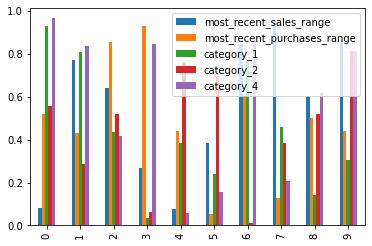

In [ ]:
 dfcat = pd.DataFrame(np.random.rand(10, 5), columns=["most_recent_sales_range", "most_recent_purchases_range", "category_1", "category_2","category_4"])
 dfcat.plot.bar();

**Observation:**

Can see most_recent_sales ,most_ recent_purchases_range are not constant .Can see some growth.

showing 

<Figure size 432x288 with 0 Axes>

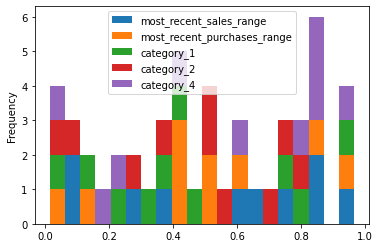

In [ ]:
 plt.figure();

 df2.plot.hist(stacked=True, bins=20);

Observation :

can see growth on most_recent_sales_range

**Numerical feature analysis of merchant csv**

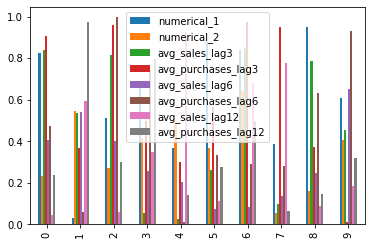

In [ ]:
dfnum = pd.DataFrame(np.random.rand(10, 8), columns=["numerical_1", "numerical_2", "avg_sales_lag3", "avg_purchases_lag3", "avg_sales_lag6", "avg_purchases_lag6", "avg_sales_lag12", "avg_purchases_lag12"])
dfnum.plot.bar();

<Figure size 432x288 with 0 Axes>

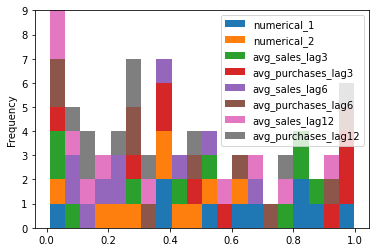

In [ ]:
plt.figure();

dfnum.plot.hist(stacked=True, bins=20);

merchants.csv have outliers that squeeze most of the data into one bin

In [ ]:
merchants_outlier = merchants.loc[(merchants['numerical_1'] < 0.1) &
                               (merchants['numerical_2'] < 0.1) &
                               (merchants['avg_sales_lag3'] < 5) &
                               (merchants['avg_purchases_lag3'] < 5) &
                               (merchants['avg_sales_lag6'] < 10) &
                               (merchants['avg_purchases_lag6'] < 10) &
                               (merchants['avg_sales_lag12'] < 10) &
                               (merchants['avg_purchases_lag12'] < 10)]

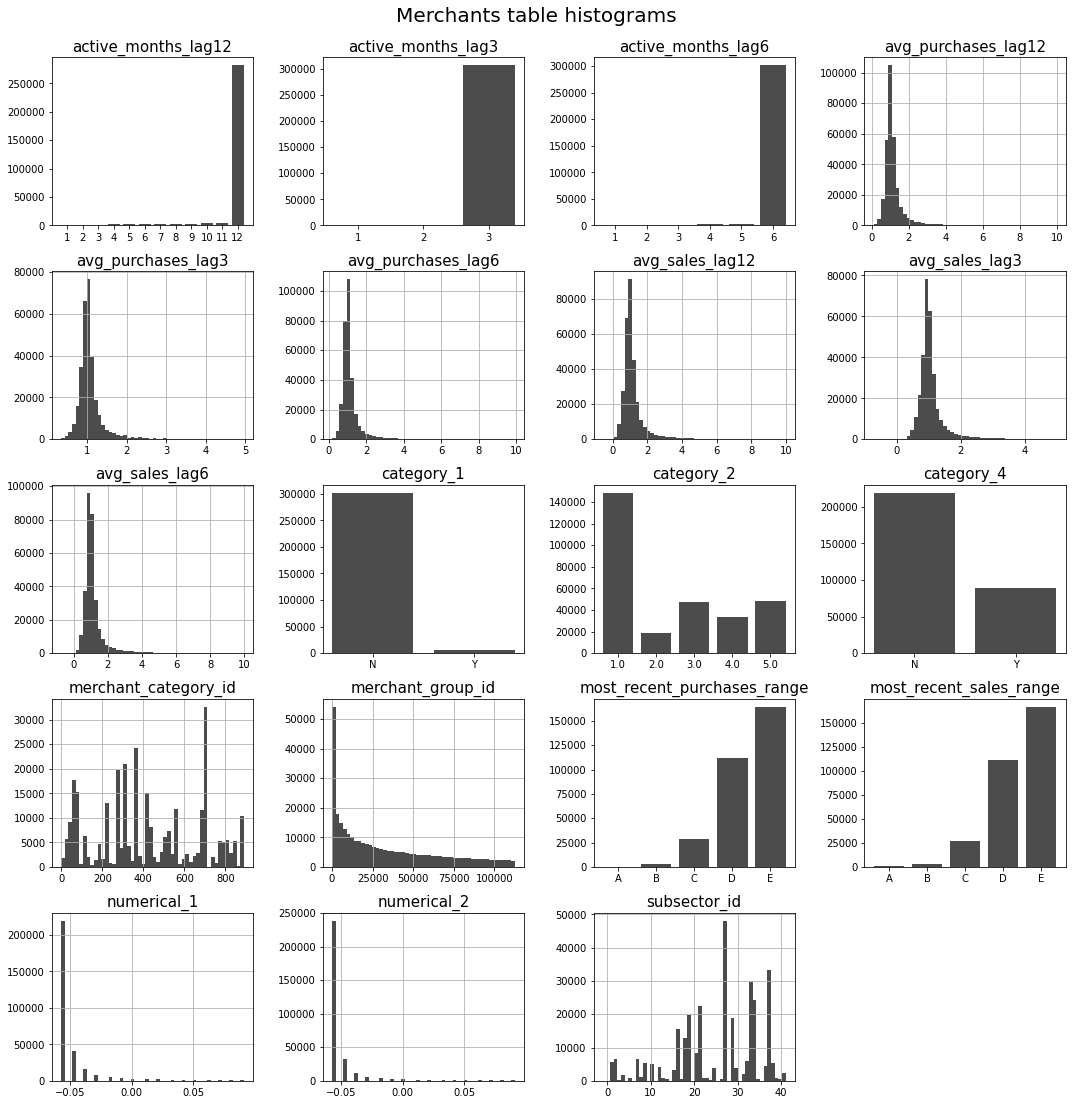

In [ ]:
cat_cols = ['active_months_lag6','active_months_lag3','most_recent_sales_range', 'most_recent_purchases_range','category_1','active_months_lag12','category_4', 'category_2']
num_cols = ['numerical_1', 'numerical_2','merchant_group_id','merchant_category_id','avg_sales_lag3', 'avg_purchases_lag3', 'subsector_id', 'avg_sales_lag6', 'avg_purchases_lag6', 'avg_sales_lag12', 'avg_purchases_lag12']

plt.figure(figsize=[15, 15])
plt.suptitle('Merchants table histograms', y=1.02, fontsize=20)
ncols = 4
nrows = int(np.ceil((len(cat_cols) + len(num_cols))/4))
last_ind = 0
for col in sorted(list(merchants_outlier.columns)):
    #print('processing column ' + col)
    if col in cat_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        vc = merchants_outlier[col].value_counts()
        x = np.array(vc.index)
        y = vc.values
        inds = np.argsort(x)
        x = x[inds].astype(str)
        y = y[inds]
        plt.bar(x, y, color=(0, 0, 0, 0.7))
        plt.title(col, fontsize=15)
    if col in num_cols:
        last_ind += 1
        plt.subplot(nrows, ncols, last_ind)
        merchants_outlier[col].hist(bins = 50, color=(0, 0, 0, 0.7))
        plt.title(col, fontsize=15)
    plt.tight_layout()

**Observations:**

Looks like merchant_group_ids, numerical_1 and numerical_2 are sorted in the descending order
and Most recent purchase range and sales range are sorted in ascendig 



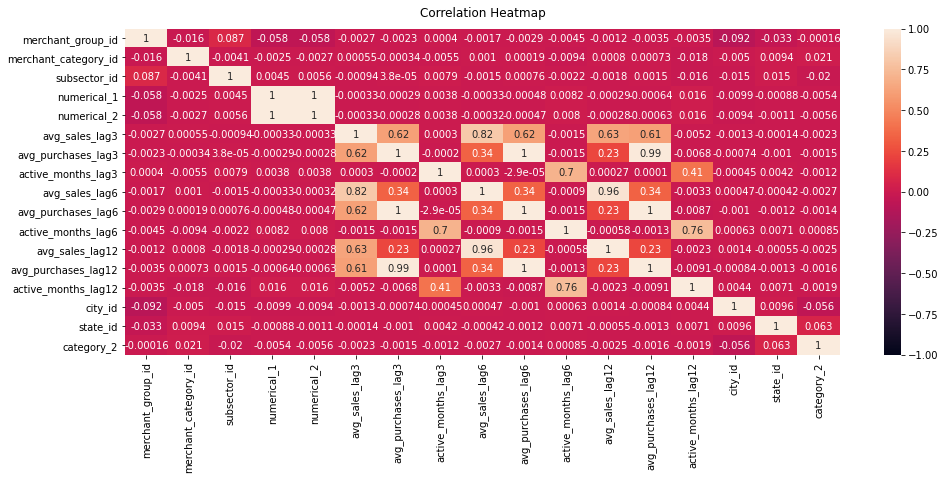

In [ ]:
heat_map(merchants)


** EDA on test.csv and train.csv.**

train.csv and test.csv column descriptions:

card_id: Unique card identifier

first_active_month: 'YYYY-MM', month of first purchase

feature_1: Anonymized card categorical feature

feature_2: Anonymized card categorical feature

feature_3: Anonymized card categorical feature

target: Loyalty numerical score calculated 2 months after historical and evaluation period!



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/train.csv")

In [ ]:
train.shape

(201917, 6)

In [ ]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
train.dtypes

first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
dtype: object

In [ ]:
train.nunique(dropna=False,axis=0) #unique value

first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64

In [ ]:
train.isnull().sum(axis=0)

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [ ]:
train[["target"]].describe()

,target
count,201917.000000
mean,-0.393636
std,3.850500
min,-33.219281
25%,-0.883110
50%,-0.023437
75%,0.765453
max,17.965068


In [ ]:
train.groupby("feature_1").size()

feature_1
1    12037
2    55797
3    73573
4    19885
5    40625
dtype: int64

In [ ]:
train.groupby("feature_2").size()

feature_2
1    89242
2    74839
3    37836
dtype: int64

In [ ]:
train.groupby("feature_3").size()

feature_3
0     87719
1    114198
dtype: int64

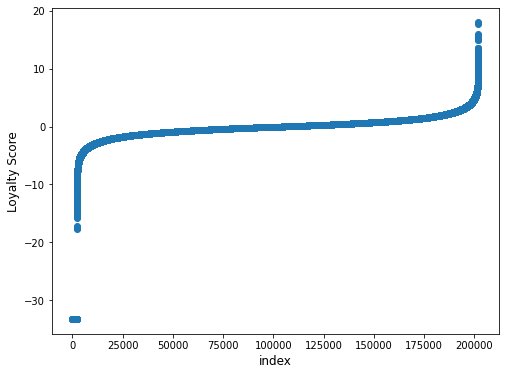

In [ ]:
target_col = "target"

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



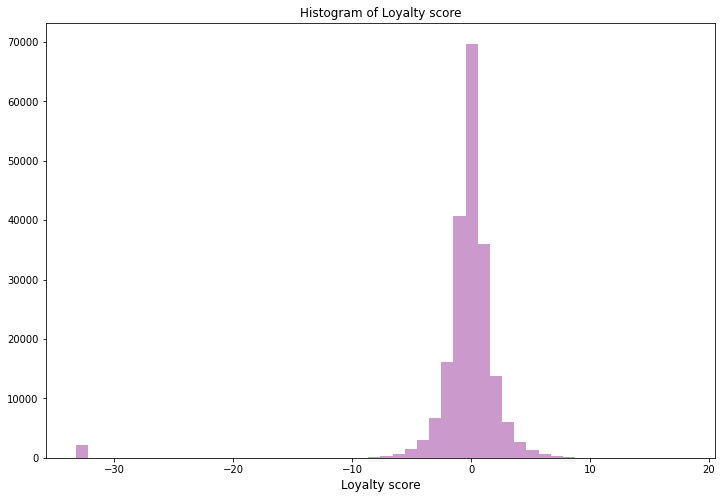

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(train[target_col].values, bins=50, kde=False, color="purple")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

We can see that some of the loyalty values are far apart (less than -30) compared to others

In [ ]:
(train[target_col]<-30).sum()


2207

We have about 2207 rows , which has values different from the rest

In [ ]:
(train[target_col]>10).sum()

48

 Extremely HIGH scores 48



**Feature 1,2 & 3:**

In this section, let us see if the other variables in the train dataset has good predictive power in finding the loyalty score.

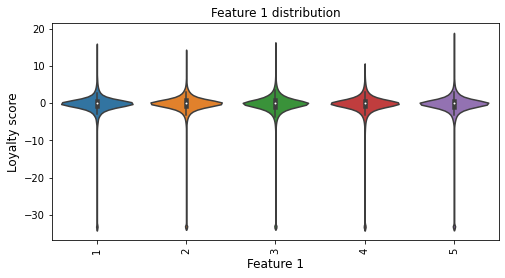

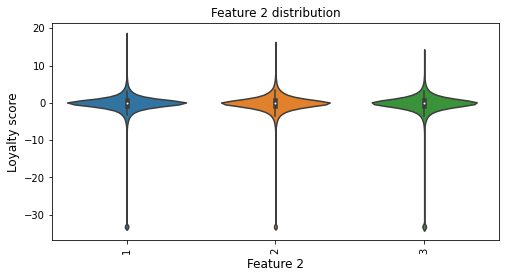

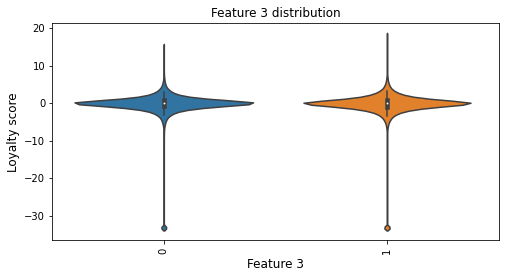

In [ ]:
# feature 1
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_1", y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

# feature 2
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_2", y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

# feature 3
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_3", y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()

the distribution of the different categories in all three features look kind of similar

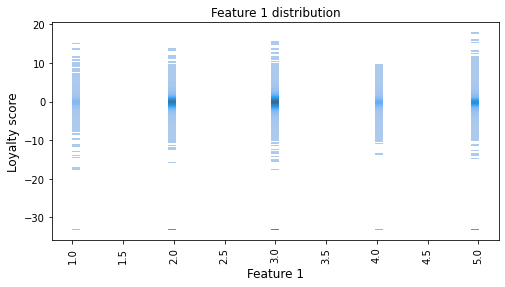

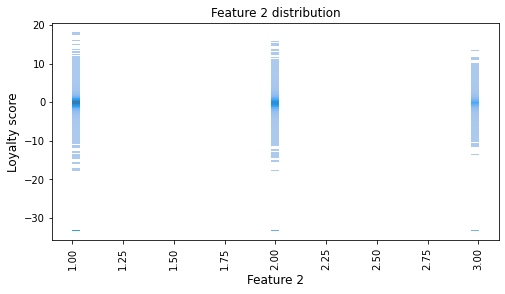

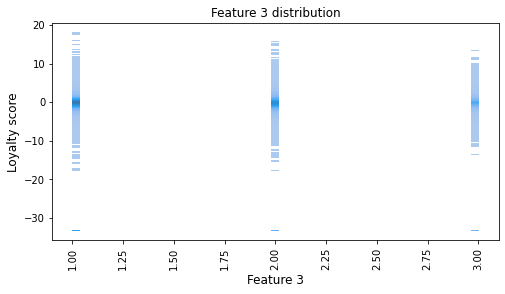

In [ ]:
# feature 1
plt.figure(figsize=(8,4))
sns.histplot(x="feature_1", y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

# feature 2
plt.figure(figsize=(8,4))
sns.histplot(x="feature_2", y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()


# feature 3
plt.figure(figsize=(8,4))
sns.histplot(x="feature_2", y=target_col, data=train)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()

Can see feature 2 & 3 have almost same distribution

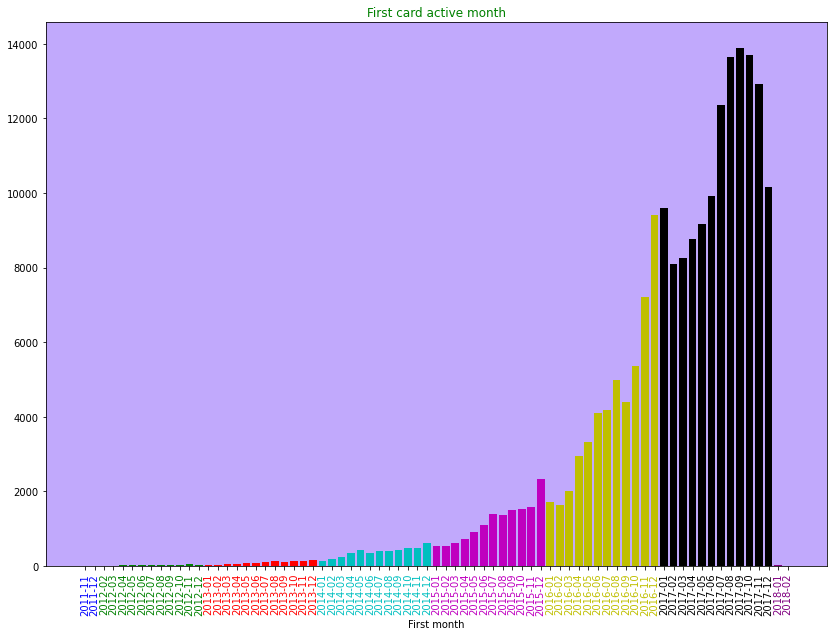

In [ ]:
#https://www.kaggle.com/maffei2443/elo-eda

first_mount = train.first_active_month.value_counts()
srt = first_mount.sort_index()
years = srt.index.str[:4].unique()

# WHITE color doesn't well... appear
MY_BASE_COLORS = colors.BASE_COLORS.copy()
del MY_BASE_COLORS['w']
MY_BASE_COLORS['purple'] = 'purple'

year_cmap = dict(zip(years, MY_BASE_COLORS))

cmap_seq = srt.index.map(lambda x: year_cmap[x[:4]])


fig = plt.figure(figsize=(14, 10))

plt.bar(
    srt.index,
    srt.values,
    color=cmap_seq,
)
plt.xticks(rotation='vertical');
plt.xlabel('First month');
plt.title('First card active month', color='g');

ax = plt.gca()
ax.set_facecolor((.6, .44, .98, .6))
# fig.patch.set_facecolor('xkcd:mint green')
for i, t in enumerate(plt.gca().get_xticklabels()):
    t.set_color( cmap_seq[i] )
plt.show()


**Observation:**

Can see 2017 has more transaction

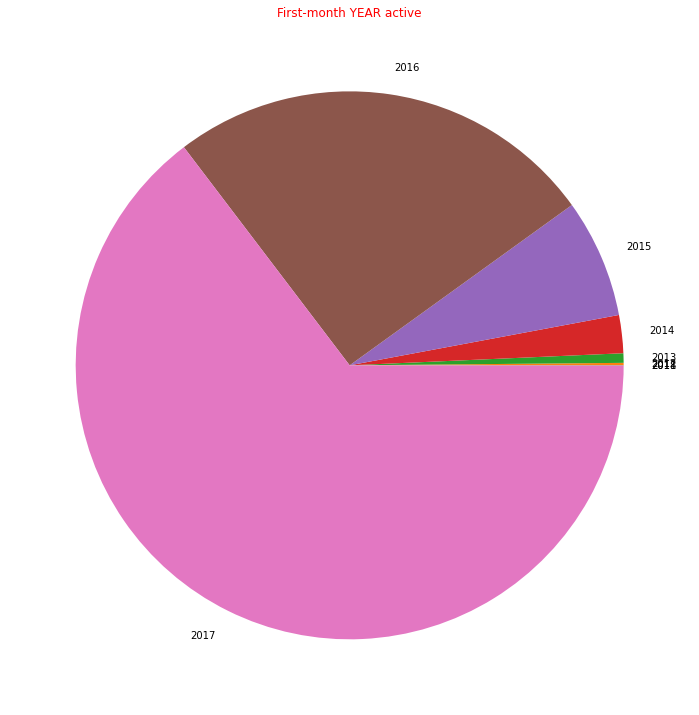

In [ ]:
#maffei2443/elo-eda

first_month = train.first_active_month.value_counts()
srt = first_month.sort_index()
years = srt.index.str[:4].unique()
year_cmap = dict(zip(years, MY_BASE_COLORS))

vc =train.first_active_month.str[:4].value_counts()
srt=vc.sort_index()

indices = np.arange(len(srt))
fig, ax = plt.subplots(figsize=(12.8, 12.6))
ax.pie(
    srt.values,
    labels=srt.index
)
ax.set_title('First-month YEAR active', fontdict={'color': 'red'});
plt.show()


# EDA on Test data

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv")

In [ ]:
test.shape

(123623, 5)

In [ ]:
test.dtypes

first_active_month    object
card_id               object
feature_1              int64
feature_2              int64
feature_3              int64
dtype: object

In [ ]:
test.groupby("feature_1").size()


feature_1
1     7406
2    34115
3    44719
4    12332
5    25051
dtype: int64

In [ ]:
test.groupby("feature_2").size()

feature_2
1    54775
2    45993
3    22855
dtype: int64

In [ ]:
test.groupby("feature_3").size()

feature_3
0    53853
1    69770
dtype: int64

**Feature distributions in train.csv and test.csv**

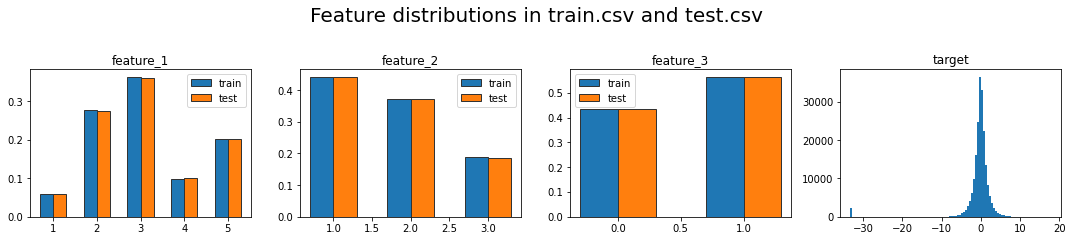

In [ ]:
%matplotlib inline
#Comparing Feature distributions in train & test Data

plt.figure(figsize=[15,5])
plt.suptitle('Feature distributions in train.csv and test.csv', fontsize=20, y=1.1)
for num, col in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
    plt.subplot(2, 4, num+1)
    if col is not 'target':
        v_c = train[col].value_counts() / train.shape[0]
        plt.bar(v_c.index, v_c, label=('train'), align='edge', width=-0.3, edgecolor=[0.2]*3)
        v_c = test[col].value_counts() / test.shape[0]
        plt.bar(v_c.index, v_c, label=('test'), align='edge', width=0.3, edgecolor=[0.2]*3)
        plt.title(col)
        plt.legend()
    else:
        plt.hist(train[col], bins = 100) # Histogram of target variable
        plt.title(col)
    plt.tight_layout()
plt.tight_layout()
plt.show()

**Observation:**

We can see from above plots that test and train data are distributed similarly.  there are some outliers in the target column.

** Outlier vs. non-outlier feature distributions**

2207 outliers found (target < -30)


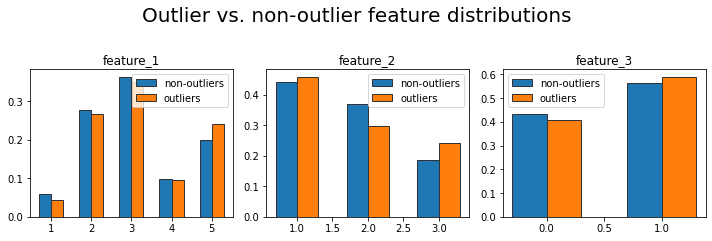

In [ ]:
# Separating outliers and non_outliers features in Target and plotting
outliers = train.loc[train['target'] < -30]
non_outliers = train.loc[train['target'] >= -30]
print('{:d} outliers found (target < -30)'.format(outliers.shape[0]))

#Outlier vs. non-outlier feature distributions
plt.figure(figsize=[10,5])
plt.suptitle('Outlier vs. non-outlier feature distributions', fontsize=20, y=1.1)

for num, col in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
    if col is not 'target':
        plt.subplot(2, 3, num+1)
        v_c = non_outliers[col].value_counts() / non_outliers.shape[0]
        plt.bar(v_c.index, v_c, label=('non-outliers'), align='edge', width=-0.3, edgecolor=[0.2]*3)
        v_c = outliers[col].value_counts() / outliers.shape[0]
        plt.bar(v_c.index, v_c, label=('outliers'), align='edge', width=0.3, edgecolor=[0.2]*3)
        plt.title(col)
        plt.legend()

plt.tight_layout()
plt.show()

Observation

We can see There are some very little differences between outliers and non-outliers

 **Correlation coefficients for all variables**

In [ ]:
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


In [ ]:
def heat_map(df):
  plt.figure(figsize=(16, 6))
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

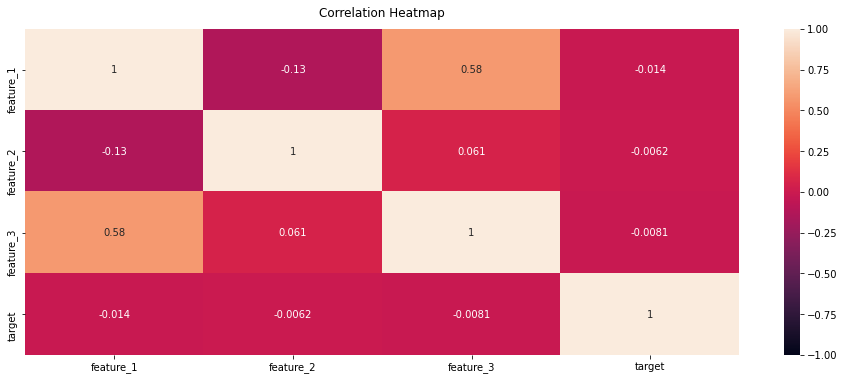

In [ ]:
heat_map(train)

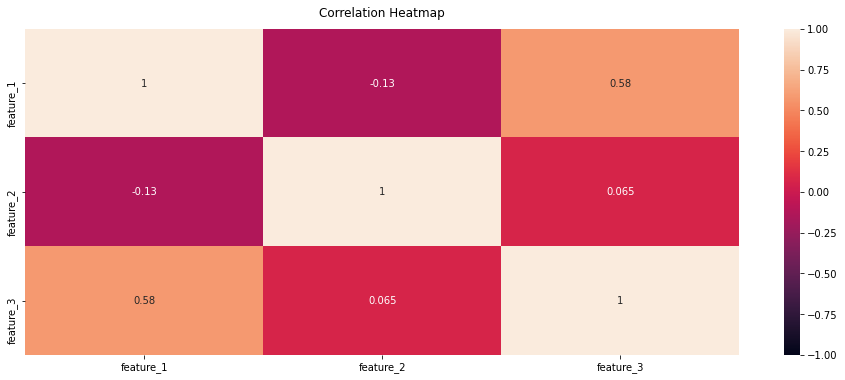

In [ ]:
heat_map(test)

Observation:-

In Train feature 1,2,3 are looking highly corelated
 
In Test features are looking less corelated.


**historical_transactions.csv¶**


In [ ]:
historical_transactions = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/historical_transactions.csv')

In [ ]:
historical_transactions.shape

(29112361, 14)

In [ ]:

historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
historical_transactions.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [ ]:
historical_transactions.nunique(dropna=False,axis=0)

authorized_flag                2
card_id                   325540
city_id                      308
category_1                     2
installments                  15
category_3                     4
merchant_category_id         327
merchant_id               326312
month_lag                     14
purchase_amount           215014
purchase_date           16395300
category_2                     6
state_id                      25
subsector_id                  41
dtype: int64

In [ ]:
historical_transactions.isnull().sum(axis=0)

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

We can see that there are:

**6 features type ID**: card_id, merchant_category_id, subsector_id, merchant_id, city_id, state_id
2 features type integer/counter: month_lag, installments

**1 feature type numerical**: purchase_amount

**1 feature type date**: purchase_date

**4 features type categorical**: authorized_flag, category_3, category_1, category_2

In [ ]:
historical_transactions[["month_lag","installments","month_lag","installments"]].describe()

,month_lag,installments,month_lag,installments
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07
mean,-4.487294e+00,6.484954e-01,-4.487294e+00,6.484954e-01
std,3.588800e+00,2.795577e+00,3.588800e+00,2.795577e+00
min,-1.300000e+01,-1.000000e+00,-1.300000e+01,-1.000000e+00
25%,-7.000000e+00,0.000000e+00,-7.000000e+00,0.000000e+00
50%,-4.000000e+00,0.000000e+00,-4.000000e+00,0.000000e+00
75%,-2.000000e+00,1.000000e+00,-2.000000e+00,1.000000e+00
max,0.000000e+00,9.990000e+02,0.000000e+00,9.990000e+02


In [ ]:
historical_transactions.groupby("authorized_flag").size()

authorized_flag
N     2516909
Y    26595452
dtype: int64

In [ ]:
historical_transactions.groupby("category_3").size()

category_3
A    15411747
B    11677522
C     1844933
dtype: int64

In [ ]:
historical_transactions.groupby("category_1").size()

category_1
N    27028332
Y     2084029
dtype: int64

In [ ]:
historical_transactions.groupby("category_2").size()

category_2
1.0    15177199
2.0     1026535
3.0     3911795
4.0     2618053
5.0     3725915
dtype: int64

In [ ]:
historical_transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [ ]:
historical_transactions=historical_transactions.drop(historical_transactions.columns[[2,3,5,6,7,10,11,12,13]], axis=1)

In [ ]:
historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   card_id          object 
 1   installments     int64  
 2   purchase_amount  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 666.3+ MB


**new_merchant_transactions.csv**

In [ ]:
new_merchant_transactions = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/new_merchant_transactions.csv')

In [ ]:
new_merchant_transactions.shape

(1963031, 14)

In [ ]:
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
new_merchant_transactions.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [ ]:
new_merchant_transactions.nunique(dropna=False,axis=0)

authorized_flag               1
card_id                  290001
city_id                     308
category_1                    2
installments                 15
category_3                    4
merchant_category_id        314
merchant_id              226130
month_lag                     2
purchase_amount           75190
purchase_date           1667025
category_2                    6
state_id                     25
subsector_id                 41
dtype: int64

In [ ]:
new_merchant_transactions.nunique(dropna=False,axis=0)

authorized_flag               1
card_id                  290001
city_id                     308
category_1                    2
installments                 15
category_3                    4
merchant_category_id        314
merchant_id              226130
month_lag                     2
purchase_amount           75190
purchase_date           1667025
category_2                    6
state_id                     25
subsector_id                 41
dtype: int64

We can see that there are:

**6 features type ID**: card_id, merchant_category_id, subsector_id, merchant_id, city_id, state_id

**2 features type integer/counte**r: month_lag, installments

**1 feature type numerical**: purchase_amount

**1 feature type date**: purchase_date

**4 features type categorical**: authorized_flag, category_3, category_1, category_2

Exploring the connections between datasets

In [ ]:
def isin(a,b):
    From = pd.DataFrame(a)
    To = pd.DataFrame(b)
    return(np.mean(From[0].isin(To[0])))

% of unique credit cards from train.csv in test.csv

In [ ]:
isin(train["card_id"].unique(),test["card_id"].unique())

0.0

unique credit cards from train.csv in historical_transactions.csv

In [ ]:
isin(train["card_id"].unique(),historical_transactions["card_id"].unique())

1.0

% of unique credit cards from train.csv in new_merchant_transactions.csv

In [ ]:
isin(train["card_id"].unique(),new_merchant_transactions["card_id"].unique())

0.8913860645710862

2.** test.csv with the rest**

% of unique credit cards from test.csv in train.csv

In [ ]:
isin(test["card_id"].unique(),train["card_id"].unique())

0.0

% of unique credit cards from test.csv in historical_transactions.csv

In [ ]:
isin(test["card_id"].unique(),historical_transactions["card_id"].unique())

1.0

% of unique credit cards from test.csv in new_merchant_transactions.csv

In [ ]:

isin(test["card_id"].unique(),new_merchant_transactions["card_id"].unique())

0.8899233961317877

3. historical_transactions.csv with the rest

% of unique credit cards from historical_transactions.csv in train.csv

In [ ]:

isin(historical_transactions["card_id"].unique(),train["card_id"].unique())

0.620252503532592

% of unique credit cards from historical_transactions.csv in test.csv

In [ ]:

isin(historical_transactions["card_id"].unique(),test["card_id"].unique())

0.379747496467408



% of unique credit cards from historical_transactions.csv in new_merchant_transactions.csv



In [ ]:
isin(historical_transactions["card_id"].unique(),new_merchant_transactions["card_id"].unique())

0.8908306198931006

 % of unique merchants from historical_transactions.csv in merchants.csv

In [ ]:
isin(historical_transactions["merchant_id"].unique(),merchants["merchant_id"].unique())

0.9999969354482826

4. new_merchant_transactions.csv with the rest

% of unique credit cards from new_merchant_transactions.csv in train.csv

In [ ]:
isin(new_merchant_transactions["card_id"].unique(),train["card_id"].unique())

0.6206392391750374

% of unique credit cards from new_merchant_transactions.csv in test.csv

In [ ]:
isin(new_merchant_transactions["card_id"].unique(),test["card_id"].unique())

0.3793607608249627

% of unique credit cards from new_merchant_transactions.csv in historical_transactions.csv

In [ ]:

isin(new_merchant_transactions["card_id"].unique(),historical_transactions["card_id"].unique())

1.0

 % of unique merchants from new_merchant_transactions.csv in merchants.csv

In [ ]:
isin(new_merchant_transactions["merchant_id"].unique(),merchants["merchant_id"].unique())

0.9999955777650025

5. merchants.csv with the rest¶

% of unique merchants from merchants.csv in historical_transactions.csv

In [ ]:
isin(merchants["merchant_id"].unique(),historical_transactions["merchant_id"].unique())

0.9751309643699216

 % of unique merchants from merchants.csv in new_merchant_transactions.csv

In [ ]:
isin(merchants["merchant_id"].unique(),new_merchant_transactions["merchant_id"].unique())

0.6757522420084092

Duplicated IDs in merchants.csv

Number of duplicates in merchants.csv using all features

In [ ]:
tmp = merchants.drop_duplicates()
merchants.shape[0]-tmp.shape[0]

0

Number of duplicates in merchants.csv using the ID features merchant_id, merchant_category_id, subsector_id

In [ ]:
tmp = merchants.drop_duplicates(subset=["merchant_id","merchant_category_id","subsector_id"])
merchants.shape[0]-tmp.shape[0]

62

Number of duplicates in merchants.csv using only ID feature merchant_id

In [ ]:
tmp = merchants.drop_duplicates(subset="merchant_id")
merchants.shape[0]-tmp.shape[0]

63

Number of duplicates in merchants.csv using all ID features merchant_id, merchant_group_id, merchant_category_id, subsector_id, city_id",state_id*

In [ ]:
tmp = merchants.drop_duplicates(subset=["merchant_id","merchant_group_id","merchant_category_id",
                                        "subsector_id","city_id","state_id"])
merchants.shape[0]-tmp.shape[0]

51


Number of duplicates in merchants.csv using the ID features merchant_id, merchant_group_id, merchant_category_id, subsector_id

In [ ]:
tmp = merchants.drop_duplicates(subset=["merchant_id","merchant_group_id","merchant_category_id",
                                        "subsector_id"])
merchants.shape[0]-tmp.shape[0]

51

Number of duplicates in merchants.csv using the ID features merchant_id, merchant_category_id, subsector_id, city_id, state_id

In [ ]:
tmp = merchants.drop_duplicates(subset=["merchant_id","merchant_category_id","subsector_id","city_id",
                                        "state_id"])
merchants.shape[0]-tmp.shape[0]

62

In [ ]:
pd.merge(historical_transactions, train, on='card_id')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target
0,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3.0,11,37,2017-01,5,1,1,-2.352713
1,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-4,1.189469,2017-08-14 15:46:08,1.0,15,19,2017-01,5,1,1,-2.352713
2,Y,C_ID_5037ff576e,138,N,1,B,705,M_ID_efc106141c,-9,-0.640069,2017-03-05 14:57:51,1.0,15,33,2017-01,5,1,1,-2.352713
3,Y,C_ID_5037ff576e,226,N,1,B,307,M_ID_708022307c,-4,-0.652256,2017-08-15 10:45:28,1.0,16,19,2017-01,5,1,1,-2.352713
4,Y,C_ID_5037ff576e,330,N,1,B,705,M_ID_393b4b8cec,-9,-0.674210,2017-03-26 20:00:31,3.0,17,33,2017-01,5,1,1,-2.352713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18030004,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.632706,2017-01-20 08:52:04,NaN,-1,34,2016-05,1,2,0,-0.462466
18030005,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.632706,2017-02-20 04:40:50,NaN,-1,34,2016-05,1,2,0,-0.462466
18030006,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37,2017-10,2,2,0,0.719115
18030007,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9,2017-10,2,2,0,0.719115


In [ ]:
historical_transactions.info

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
train=train.drop(train.columns[[0,2,3,4]], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [ ]:
train1=pd.merge( train, historical_transactions, on='card_id')

In [ ]:
train1.shape

(18030009, 6)

In [ ]:
tr=train1.drop_duplicates(subset=['target']) #dropped all duplicate values

In [ ]:
tr.shape

(197110, 6)

In [ ]:
tr.shape

(100000, 4)

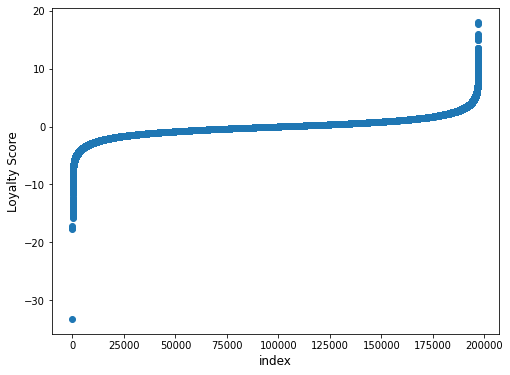

In [ ]:
target_col = "target"

plt.figure(figsize=(8,6))
plt.scatter(range(tr.shape[0]), np.sort(tr[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

**OBSERVATION**


Can see some outlier.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



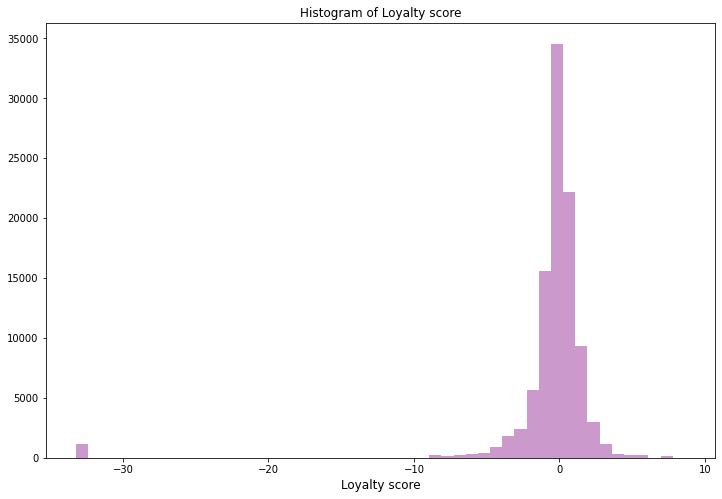

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(tr[target_col].values, bins=50, kde=False, color="purple")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

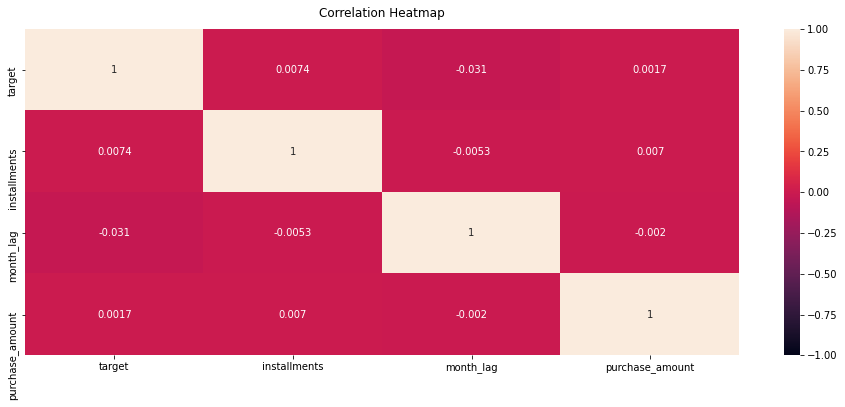

In [ ]:
heat_map(tr)

Observation

Purshase amount corelated well with installment and target.

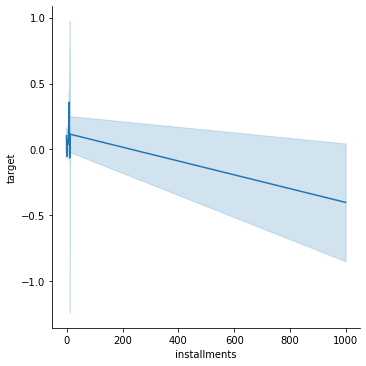

In [ ]:
sns.relplot(x="installments", y="target", kind="line", data=tr)

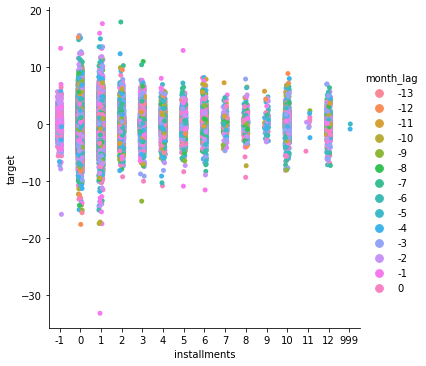

In [ ]:
sns.catplot(x="installments", y="target", hue="month_lag", data=tr);

**Observation**

Very few month_lag found on negative side of target.

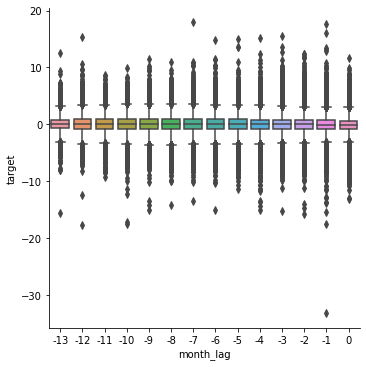

In [ ]:
sns.catplot(x="month_lag", y="target", kind="box", data=tr);

**Observation:-**

can see outlier in month_lag -1

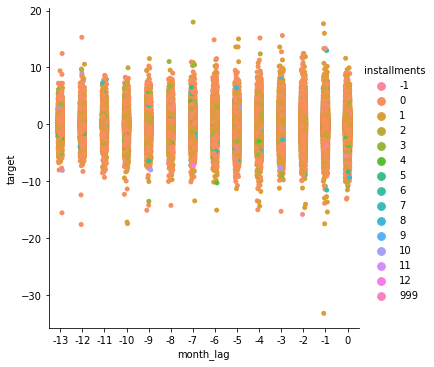

In [ ]:
sns.catplot(x="month_lag", y="target", hue="installments",
             data=tr);

**Observation:-**

Can see most of the target score depends on first(1) insallments



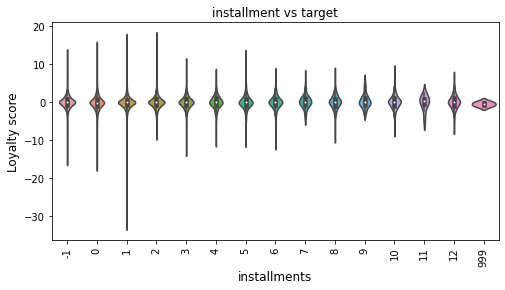

In [ ]:
# feature 1
plt.figure(figsize=(8,4))
sns.violinplot(x="installments", y="target", data=tr)
plt.xticks(rotation='vertical')
plt.xlabel('installments', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("installment vs target")
plt.show()

**Observation**

Can see some outlier in target 

Final Observation:

Loyalty score distribution have some outliers it means some transactions which happened and exist in our train data is having some weird values.





```
# This is formatted as code
```

**Tried all model with limited Features but kaggle score did not improved much.

In [ ]:
new_merchant_transactions = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/new_merchant_transactions.csv')

In [ ]:
historical_transactions = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/historical_transactions.csv')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/train.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv")

In [ ]:
def missingvalue(df):
    for i in df.columns:
        if df[i].dtype == "object":
            df[i] = df[i].fillna("other")
        elif (df[i].dtype == "int64" or df[i].dtype == "float64"):
            df[i] = df[i].fillna(df[i].mean())
        else:
            pass
    return df

# missing values for all datasets
for df in [train, test,new_merchant_transactions,  historical_transactions]:
    missingvalue(df)    

In [ ]:
train['outliers'] = 0
train.loc[train['target'] < -30, 'outliers'] = 1
train['outliers'].value_counts()

0    199710
1      2207
Name: outliers, dtype: int64

In [ ]:
#https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

def train_testdatetime(df, col='first_active_month'):
    df['my_dates'] = pd.to_datetime(df[col], errors='coerce')
    
  
    #df['day'] = pd.to_datetime(dt_col).dt.weekday
    
    
    df['month'] = df['my_dates'].dt.month
  
    df['year'] = train['my_dates'].dt.year
    
    

    return df



    

#extraction of datetime values for train and test
train = train_testdatetime(train, col='first_active_month')
test = train_testdatetime(test, col='first_active_month')


In [ ]:
train = pd.get_dummies(train, columns=['feature_1', 'feature_2'])
test = pd.get_dummies(test, columns=['feature_1', 'feature_2'])

In [ ]:

historical_transactions['authorized_flag'] = historical_transactions['authorized_flag'].map({'Y': 1, 'N': 0})

In [ ]:
def aggregate_transactions(trans, prefix):  
  #trans.loc[:, 'purchase_date'] = pd.to_numeric(trans['purchase_date']).\
                                     # astype(np.int64) * 1e-9
                                     
  trans['purchase_date'] = pd.to_datetime(trans['purchase_date'], errors='coerce') 
  #trans['purchase_date'] = df['purchase_date'].astype('datetime64').astype(int).astype(float)                                   
  trans['weekofyear'] = trans['purchase_date'].dt.weekofyear
  trans['month'] = trans['purchase_date'].dt.month# get the month
  trans['day'] = trans['purchase_date'].dt.day# get the day
  trans['weekday'] = trans.purchase_date.dt.weekday# get the week day
  trans['weekend'] = (trans.purchase_date.dt.weekday >=5).astype(int)# weekend
  trans['hour'] =trans['purchase_date'].dt.hour# hour from the purchase date 
  # month diff is subtraction of purchase date from the today date
  trans['month_diff'] = ((datetime.today() - trans['purchase_date']).dt.days)//30
  trans['month_diff'] += trans['month_lag']
  # Here we get the duration when we multipluy the purchase amount and month_diff
  trans['duration'] = trans['purchase_amount']*trans['month_diff']
  #amount_month ratio is when we divide the purchase amount from month_diff
  trans['amount_month_ratio'] = trans['purchase_amount']/trans['month_diff']
  # price is when we divide the purchase amount from installments
  trans['price'] = trans['purchase_amount'] / trans['installments']                                  
  agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        #'purchase_date': ['max','min'],
        'month_lag': ['min', 'max']
   }
  agg_trans = trans.groupby(['card_id']).agg(agg_func)
  agg_trans.columns = [prefix + '_'.join(col).strip() 
                           for col in agg_trans.columns.values]
  agg_trans.reset_index(inplace=True)
    
  df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))
    
  agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')
    
  return agg_trans

In [ ]:
import gc
merch_hist = aggregate_transactions(historical_transactions, prefix='hist_')
del historical_transactions
gc.collect()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



11

In [ ]:
train = pd.merge(train, merch_hist, on='card_id',how='left')
test = pd.merge(test, merch_hist, on='card_id',how='left')
del merch_hist
gc.collect()

140

In [ ]:
new_merchant_transactions['authorized_flag'] = new_merchant_transactions['authorized_flag'].map({'Y': 1, 'N': 0})

In [ ]:
merch_new = aggregate_transactions(new_merchant_transactions, prefix='new_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
del new_merchant_transactions
gc.collect()

263

In [ ]:
train = pd.merge(train, merch_new, on='card_id',how='left')
test = pd.merge(test, merch_new, on='card_id',how='left')
del merch_new
gc.collect()

88

In [ ]:
final_feature = ['card_id', 'first_active_month', 'target','my_dates','outliers']
use_cols = [c for c in train.columns if c not in final_feature]
use_test = [c for c in test.columns if c not in final_feature]

In [ ]:
train=train.drop_duplicates(subset=['target']) 

In [ ]:
train_Y=train["target"]

In [ ]:
Train_x=train[use_cols]

In [ ]:
test=test[use_test]

In [ ]:
Train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197110 entries, 0 to 201916
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   card_id                    197110 non-null  object 
 1   feature_3                  197110 non-null  int64  
 2   month                      197110 non-null  int64  
 3   year                       197110 non-null  int64  
 4   feature_1_1                197110 non-null  uint8  
 5   feature_1_2                197110 non-null  uint8  
 6   feature_1_3                197110 non-null  uint8  
 7   feature_1_4                197110 non-null  uint8  
 8   feature_1_5                197110 non-null  uint8  
 9   feature_2_1                197110 non-null  uint8  
 10  feature_2_2                197110 non-null  uint8  
 11  feature_2_3                197110 non-null  uint8  
 12  hist_transactions_count    197110 non-null  int64  
 13  hist_authorized_flag_sum   19

In [ ]:
from sklearn.preprocessing import LabelEncoder 
lbe = LabelEncoder()
lbe = lbe.fit(Train_x['card_id'])
card_id = lbe.transform(Train_x['card_id']) 
Train_x['card_id'] = card_id 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
lbetest = LabelEncoder()
lbetest = lbetest.fit(test['card_id'])
card_id = lbetest.transform(test['card_id']) 
test['card_id'] = card_id 
test['card_id'].head(5)

0      5148
1      9136
2     88476
3    101761
4     20931
Name: card_id, dtype: int64

In [ ]:
for col in use_cols:
    for df in [train, test]:
        if df[col].dtype == "float64" :
            df[col] = df[col].fillna(df[col].mean())

In [ ]:
train_Y.shape

(197110,)

In [ ]:
y=train_Y[:123623]

In [ ]:
Train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197110 entries, 0 to 201916
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   card_id                    197110 non-null  int64  
 1   feature_3                  197110 non-null  int64  
 2   month                      197110 non-null  int64  
 3   year                       197110 non-null  int64  
 4   feature_1_1                197110 non-null  uint8  
 5   feature_1_2                197110 non-null  uint8  
 6   feature_1_3                197110 non-null  uint8  
 7   feature_1_4                197110 non-null  uint8  
 8   feature_1_5                197110 non-null  uint8  
 9   feature_2_1                197110 non-null  uint8  
 10  feature_2_2                197110 non-null  uint8  
 11  feature_2_3                197110 non-null  uint8  
 12  hist_transactions_count    197110 non-null  int64  
 13  hist_authorized_flag_sum   19

In [ ]:
test.shape

(123623, 42)

In [ ]:
Train_x.shape

(197110, 42)

MODEL RandomForestRegressor

**Random Hyperparameter Grid**

To use RandomizedSearchCV, we first need to create a parameter grid .

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 500)}
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
random_search.fit(Train_x, train_Y)              

In [ ]:
print(random_search.best_params_)

{'bootstrap': True, 'max_depth': 3, 'max_features': 8, 'min_samples_split': 6, 'n_estimators': 199}


In [ ]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=10,min_samples_split=6,bootstrap=True,random_state = 42)
rf.fit(Train_x,train_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
pred=rf.predict(test)
print(np.sqrt(mean_squared_error(y, pred)))

1.822024493056381


In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv")

In [ ]:
lbe_sam = LabelEncoder()
lbe_sam = lbe_sam.fit(sample['card_id'])
card_id = lbe_sam.transform(sample['card_id']) 
test['card_id'] = card_id 
test['card_id'].head() 




0      5148
1      9136
2     88476
3    101761
4     20931
Name: card_id, dtype: int64

In [ ]:
final_pred = rf.predict(test)

In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] = final_pred
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

In [ ]:
sample.head(10)

,card_id,target
0,C_ID_0ab67a22ab,-0.049002
1,C_ID_130fd0cbdd,-0.039538
2,C_ID_b709037bc5,0.207336
3,C_ID_d27d835a9f,0.083762
4,C_ID_2b5e3df5c2,-0.091648
5,C_ID_5814b4f13c,0.215658
6,C_ID_a1b3c75277,0.069796
7,C_ID_f7cada36d3,0.076552
8,C_ID_9d2bc8dfc4,-0.021982
9,C_ID_6d8dba8475,-0.016378


The above code block we have the following parameters:

**max_depth**: this specifies the depth of the tree that will be formed.

**max_features**: the total number of features to consider. This is going to be a random value between 1 and the maximum features that we have. In our case, the maximum number can be 7.

**min_samples_split**: this specifies the minimum number of samples to consider for each split. It will be a random value between 2 and 11.

**bootstrap**: whether or not to use bootstrap samples when building trees. If this is False, then the whole dataset will be used.
n_estimators: the number of trees to use for building the random forest.

**XGBoost training**

In [ ]:
xg = xgb.XGBRegressor(
        max_depth = 3,
        learning_rate = 0.06,
        n_estimators = 2500,
        subsample = .9,
        colsample_bylevel = .9,
        colsample_bytree = .9,
        min_child_weight= .9,
        gamma = 0,
        random_state = 100,
        booster = 'gbtree',
        objective = 'reg:linear'
    )

In [ ]:
xg.fit(Train_x,train_Y)

[13:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=3, min_child_weight=0.9, missing=None, n_estimators=2500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
preds=xg.predict(test)
print(np.sqrt(mean_squared_error(y, preds)))

1.835841881737206


In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] = preds
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

**Plot feature importance¶**

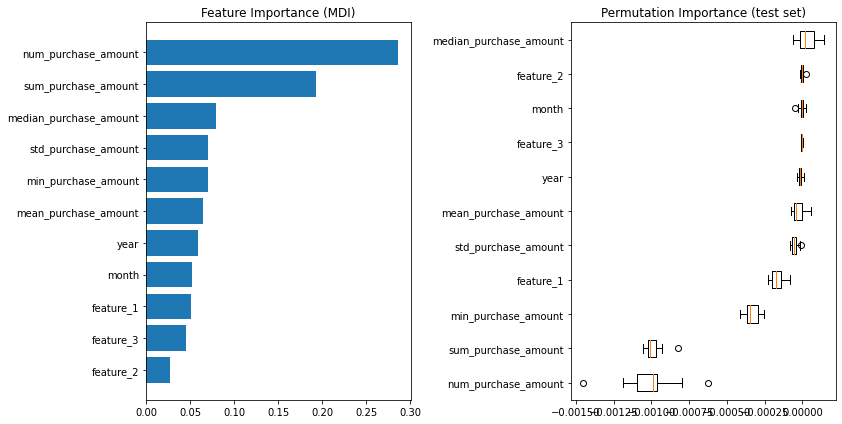

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#
# Feature importance
from sklearn.inspection import permutation_importance

imp_df = pd.DataFrame()
imp_df = train_features
feature_importance = xg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(imp_df)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(xg, test, y, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(imp_df)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

**CATBOOST**

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 65.7MB 54kB/s 


In [ ]:
from catboost import CatBoostRegressor, FeaturesData, Pool

In [ ]:
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=6)
# Fit model
model.fit(Train_x,train_Y)
# Get predictions
preds = model.predict(test)

0:	learn: 1.7187164	total: 56.5ms	remaining: 1m 52s
1:	learn: 1.7104972	total: 112ms	remaining: 1m 52s
2:	learn: 1.7028991	total: 167ms	remaining: 1m 51s
3:	learn: 1.6961729	total: 226ms	remaining: 1m 52s
4:	learn: 1.6897447	total: 295ms	remaining: 1m 57s
5:	learn: 1.6839082	total: 350ms	remaining: 1m 56s
6:	learn: 1.6787675	total: 405ms	remaining: 1m 55s
7:	learn: 1.6737446	total: 459ms	remaining: 1m 54s
8:	learn: 1.6693125	total: 524ms	remaining: 1m 55s
9:	learn: 1.6651749	total: 585ms	remaining: 1m 56s
10:	learn: 1.6612007	total: 641ms	remaining: 1m 55s
11:	learn: 1.6577140	total: 693ms	remaining: 1m 54s
12:	learn: 1.6544856	total: 752ms	remaining: 1m 54s
13:	learn: 1.6512523	total: 803ms	remaining: 1m 53s
14:	learn: 1.6483462	total: 858ms	remaining: 1m 53s
15:	learn: 1.6456682	total: 911ms	remaining: 1m 52s
16:	learn: 1.6432447	total: 976ms	remaining: 1m 53s
17:	learn: 1.6410582	total: 1.03s	remaining: 1m 53s
18:	learn: 1.6389565	total: 1.09s	remaining: 1m 53s
19:	learn: 1.6370752	

In [ ]:
print(np.sqrt(mean_squared_error(y, preds)))

1.865456795516052


In [ ]:
#final_pred = model.predict(test)

In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] =  preds
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

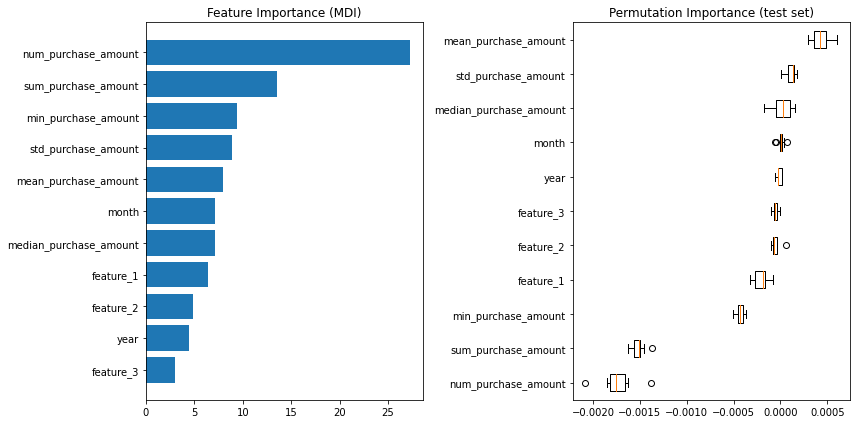

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(imp_df)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(model, test, y, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(imp_df)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

**AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(Train_x,train_Y)
# Get predictions
preds = regr.predict(test)
print(np.sqrt(mean_squared_error(y, preds)))

2.038873643943124


In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] = preds
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

**StackingRegressor**

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [ ]:
lr = LinearRegression()
xg = xgb.XGBRegressor(
        max_depth = 3,
        learning_rate = 0.03,
        n_estimators = 100,
        subsample = .9,
        colsample_bylevel = .9,
        colsample_bytree = .9,
        min_child_weight= .9,
        gamma = 0,
        random_state = 100,
        booster = 'gbtree',
        objective = 'reg:linear'
    )


rf = RandomForestRegressor(n_estimators=199, max_depth=3,min_samples_split=6,bootstrap=True,random_state = 42)
cb = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=5)

stregr = StackingRegressor(regressors=[xg,rf,cb], 
                           meta_regressor=cb)
stregr.fit(Train_x,train_Y)
# Get predictions
preds = stregr.predict(test)
print(np.sqrt(mean_squared_error(y, preds)))

[20:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 1.7194311	total: 114ms	remaining: 3m 48s
1:	learn: 1.7116215	total: 162ms	remaining: 2m 41s
2:	learn: 1.7044351	total: 212ms	remaining: 2m 21s
3:	learn: 1.6979635	total: 260ms	remaining: 2m 9s
4:	learn: 1.6920659	total: 320ms	remaining: 2m 7s
5:	learn: 1.6864283	total: 368ms	remaining: 2m 2s
6:	learn: 1.6813224	total: 416ms	remaining: 1m 58s
7:	learn: 1.6766034	total: 466ms	remaining: 1m 56s
8:	learn: 1.6723943	total: 512ms	remaining: 1m 53s
9:	learn: 1.6682771	total: 586ms	remaining: 1m 56s
10:	learn: 1.6644137	total: 636ms	remaining: 1m 55s
11:	learn: 1.6611492	total: 682ms	remaining: 1m 53s
12:	learn: 1.6582177	total: 730ms	remaining: 1m 51s
13:	learn: 1.6552441	total: 779ms	remaining: 1m 50s
14:	learn: 1.6526041	total: 833ms	remaining: 1m 50s
15:	learn: 1.6501372	total: 881ms	remaining: 1m 49s
16:	learn: 1.6478072	total: 927ms	remaining: 1m 48s
17

In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] = preds
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

DEEP Learning Model

In [ ]:
##imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
#-------------------Build the Neural Network model-------------------
print('Building Neural Network model...')
from keras.models import Sequential
adam = optimizer=tf.keras.optimizers.Adam(lr = 0.0001, decay = 0.0000001)

model = Sequential()
model.add(Dense(48, input_dim=Train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24,
                #kernel_regularizer=regularizers.l2(0.02),
                activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="mean_squared_error", optimizer='adam')

history = model.fit(Train_x, train_Y, validation_split=0.2, epochs=3, batch_size=64)

Building Neural Network model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



Epoch 1/3
2461/2464 [============================>.] - ETA: 0s - loss: 2.9988

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



2464/2464 [==============================] - 32s 13ms/step - loss: 2.9987 - val_loss: 2.9891
Epoch 2/3
2464/2464 [==============================] - 32s 13ms/step - loss: 3.0136 - val_loss: 2.9890
Epoch 3/3
2464/2464 [==============================] - 33s 14ms/step - loss: 3.0189 - val_loss: 2.9890


In [ ]:
#Predict on test set
pre= model.predict(test)
print(np.sqrt(mean_squared_error(y, pre)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



1.7320966688280504


In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] = pre
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

LIGHTGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 10,
         'learning_rate': 0.05,
         "boosting": "gbrt",
         "metric": 'rmse'}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 2000,  n_jobs = -1)
lgb_model.fit(Train_x, train_Y)

LGBMRegressor(boosting='gbrt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.05,
              max_depth=10, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=20, min_split_gain=0.0,
              n_estimators=2000, n_jobs=-1, num_leaves=30,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#Predict on test set
pre= lgb_model.predict(test)
print(np.sqrt(mean_squared_error(y, pre)))

1.8421073701609205


In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(Train_x.values)
    rmse= np.sqrt(-cross_val_score(model, Train_x.values, train_Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,max_depth= 10,
                              learning_rate=0.05, n_estimators=2000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 1.5848 (0.0140)



In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
model.fit(Train_x, train_Y)
train_prediction = model.predict(test)
prediction = np.expm1(model.predict(test.values))
print(rmsle(y, train_prediction))

1.8266959391402342


In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/elo-merchant-category-recommendation/test.csv')

sub_df = pd.DataFrame({"card_id":test2["card_id"].values})
sub_df["target"] = pre
sub_df.to_csv("/content/drive/MyDrive/elo-merchant-category-recommendation/sample.csv", index=False, header =1)

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

Summary of the models

In [ ]:
x.field_names = ["Model", "RMSE"]
x.add_row(["RandomForestRegressor",1.734710337960035])
x.add_row(["XGBoost", 1.7350464235009109])
x.add_row(["CATBoost", 1.7351781761487601])
x.add_row(["AdaBoostRegressor", 1.9096329269067964])
x.add_row(["StackingRegressor", 1.736662419422149])
x.add_row(["DEEP Learning Model", 1.7320945310575173])
x.add_row(["LightGBM", 1.7362417561827879])
print(x)

+-----------------------+--------------------+
|         Model         |        RMSE        |
+-----------------------+--------------------+
| RandomForestRegressor | 1.734710337960035  |
|        XGBoost        | 1.7350464235009109 |
|        CATBoost       | 1.7351781761487601 |
|   AdaBoostRegressor   | 1.9096329269067964 |
|   StackingRegressor   | 1.736662419422149  |
|  DEEP Learning Model  | 1.7320945310575173 |
|        LightGBM       | 1.7362417561827879 |
+-----------------------+--------------------+
